# A very timid introduction to machine learning with scikit-learn
(Víctor Sojo | vsojo@amnh.org)

Here we will provide an all-too-brief introduction to some of the main concepts of machine learning with scikit-learn (and pandas). We will look at only one type of model, linear regression, to demonstrate the key principles of working with scikit-learn.

**References:**
+ The [scikit-learn tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#conventions).
+ The [Wikipedia article on Machine Learning](https://en.wikipedia.org/wiki/Machine_learning).
+ The data comes from the amazing [World Bank Open Data repository](https://data.worldbank.org/indicator).

## Contents
&emsp;[What is machine learning?](#What-is-machine-learning?)<br/>
&emsp;[Getting started](#Getting-started)<br/>
&emsp;&emsp;[Checking that we're running the right environment](#Checking-that-we're-running-the-right-environment)<br/>
&emsp;&emsp;[Installing scikit-learn \(if you don't have it\)](#Installing-scikit-learn-\(if-you-don't-have-it\))<br/>
&emsp;&emsp;[Importing necessary libraries](#Importing-necessary-libraries)<br/>
&emsp;[Linear Regression](#Linear-Regression)<br/>
&emsp;&emsp;[Creating a filtered dataframe](#Creating-a-filtered-dataframe)<br/>
&emsp;[Removing missing values from the pandas dataframe](#Removing-missing-values-from-the-pandas-dataframe)<br/>
&emsp;&emsp;[Visualising the columns](#Visualising-the-columns)<br/>
&emsp;&emsp;[Building the linear regression model](#Building-the-linear-regression-model)<br/>
&emsp;[Predicting values using the model fit](#Predicting-values-using-the-model-fit)<br/>
&emsp;[A bit of machine-learning philosophy](#A-bit-of-machine-learning-philosophy)<br/>
&emsp;[Using train-test-split to test a model](#Using-train-test-split-to-test-a-model)<br/>
&emsp;&emsp;[Split the dataset into ~75% training and ~25% testing](#Split-the-dataset-into-~75%-training-and-~25%-testing)<br/>
&emsp;&emsp;[Train the model with the training set](#Train-the-model-with-the-training-set)<br/>
&emsp;&emsp;[Judging the adequacy of the model using the testing set](#Judging-the-adequacy-of-the-model-using-the-testing-set)<br/>
&emsp;[A more complex model with multiple predictors](#A-more-complex-model-with-multiple-predictors)<br/>

## What is machine learning?
Most educated people younger than 60 nowadays tend to have some general idea of what machine learning is, or at least what it does. In a nutshell:
Given some input data, the computer makes a prediction about that data (i.e., a prediction that wasn't necessarily immediately obvious to a human by simply looking at the data).

There are two main types of machine learning:
+ **Supervised learning** takes a (preferrably large) set of inputs whose outcomes are known as "training data", and then gives predictions on novel "test data" based on how much it ressembles the training data. Supervised learning is itself divided into two main sub-categories:
  + **Regression:** We want to predict one or more outcome values given one or more input values (e.g., using a slope and intercept to get the value of $y$ given $x$).
  + **Classification**: Given some input data, we want to determine which of a number of possible types (classes) it belongs to.
+ **Unsupervised learning** looks for patterns within the data itself, (in principle) without comparing it to anything else. This could be for example grouping some elements of the data with similar ones into clusters.

In this notebook we will use linear regression to demonstrate the key principles of machine learning and working with `scikit-learn`.

## Getting started
### Checking that we're running the right environment
As customary, I want to confirm that I'm on the `bioinfo` environment:

In [1]:
!echo $CONDA_DEFAULT_ENV

bioinfo


### Installing scikit-learn (if you don't have it)
Just in case you haven't installed scikit-learn yet, do the following, remembering to change the `!` to `!wsl` if you're on Windows, or remove it altogether if you're doing it on the terminal(Mac|Linux)/Anaconda-Prompt(Win):
```python
!conda install -y scikit-learn
```
I already have it, so I commented the following cell out.

In [2]:
#!conda install -y scikit-learn

### Importing necessary libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Linear Regression
Perhaps you're already rather familiar with the most straightforward (pun intended) type of machine learning: linear regression., you have a straight line and you can use the slope and intercept to predict a new value of Y given X (or vice versa).

You must have download a list of country indicators that I built up from World Bank data. We can read this into `pandas`:

In [4]:
df =  pd.read_csv('WB_indicators_2016.csv')
df.head()

,Country,Region,Income_Group,Population,CO2_tons_per_capita,Primary_completion_female,Primary_completion_male,LowSecondary_completion_female,LowSecondary_completion_male,pct_Women_in_Parliament,Broadband_subscs_per1k,MobileCell_subscs_per1k,GDP_per_capita_USD,GNI_per_capita_USD,Life_expectancy
0,Afghanistan,South Asia,Low income,35383128.0,0.245101,63.604069,96.542091,36.819771,63.874481,27.710843,0.248734,610.545229,1981.112469,2000.0,63.763
1,Albania,Europe & Central Asia,Upper middle income,2876101.0,1.577163,102.297653,97.790390,NaN,NaN,22.857143,92.618097,1171.641747,12002.931900,12200.0,78.194
2,Algeria,Middle East & North Africa,Lower middle income,40551404.0,3.699156,105.560043,105.618858,87.665314,70.962387,31.601732,70.517164,1160.041216,11624.338990,11510.0,76.298
3,American Samoa,East Asia & Pacific,Upper middle income,55741.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Europe & Central Asia,High income,77297.0,6.072370,NaN,NaN,NaN,NaN,32.142857,420.326792,984.928264,NaN,NaN,NaN


It seems we have a lot of missing values (`NaN`). That's not good for scikit-learn, which needs existing data in all cells. We will therefore have to create clean dataframes for each of our analyses.

We can show the number of rows with missing data for each column in the following way:

In [5]:
df.isnull().sum()

Country                            0
Region                             0
Income_Group                       0
Population                         1
CO2_tons_per_capita                0
Primary_completion_female         84
Primary_completion_male           84
LowSecondary_completion_female    94
LowSecondary_completion_male      94
pct_Women_in_Parliament           25
Broadband_subscs_per1k            12
MobileCell_subscs_per1k           10
GDP_per_capita_USD                24
GNI_per_capita_USD                25
Life_expectancy                   16
dtype: int64

### Creating a filtered dataframe
We will create a new dataframe called `dfr` containing only the desired columns for this regression (plus country names, just in case). We do this because we'll need to drop the `NaN`s before running the model in `scikit-learn`, and we don't want to alter the original dataframe.

Let's say we want to build a model that allows us to predict the **life expectancy** of a country by **how many mobile-phone subscriptions** there are in that country. This may seem a little ridiculous, and to a point it is – although a case can certainly be made that more technology correlates with wealth which correlates with health which correlates with life expectancy. Let's take a look anyway.

In [6]:
xcol = 'MobileCell_subscs_per1k'
ycol = 'Life_expectancy'

# Let's create 
dfr = df[['Country', xcol, ycol]]
dfr

,Country,MobileCell_subscs_per1k,Life_expectancy
0,Afghanistan,610.545229,63.763000
1,Albania,1171.641747,78.194000
2,Algeria,1160.041216,76.298000
3,American Samoa,NaN,NaN
4,Andorra,984.928264,NaN
...,...,...,...
212,Virgin Islands (U.S.),NaN,79.268293
213,West Bank and Gaza,850.266814,73.589000
214,"Yemen, Rep.",604.865024,66.087000
215,Zambia,734.378028,62.464000


## Removing missing values from the pandas dataframe
We still have a lot of `NaN`s, so let's clear them:

In [7]:
dfr = dfr.dropna(how='any')
dfr

,Country,MobileCell_subscs_per1k,Life_expectancy
0,Afghanistan,610.545229,63.763
1,Albania,1171.641747,78.194
2,Algeria,1160.041216,76.298
5,Angola,450.762147,59.925
6,Antigua and Barbuda,1904.217843,76.617
...,...,...,...
211,Vietnam,1287.928699,75.172
213,West Bank and Gaza,850.266814,73.589
214,"Yemen, Rep.",604.865024,66.087
215,Zambia,734.378028,62.464


You'll see that `American Samoa` and `Andorra`, which didn't have a value for cellphone subscriptions, have been dropped from the dataframe, as have all the other rows that didn't have a value in our chosen columns. That's why our new dataframe has only `201` columns, as opposed to `217` before.

### Visualising the columns
Before we go any farther, let's take a look at what we're regressing – **It's always a very good idea to plot your data before you run any models on it**.

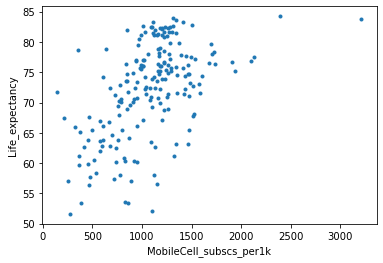

In [8]:
plt.plot(dfr[xcol], dfr[ycol], '.')
plt.xlabel(xcol)
plt.ylabel(ycol)
plt.show()

...well... I'm not too sure how great a linear relationship this will be, but let's see.

### Building the linear regression model
Now we can build a linear regression model using scikit-learn's `LinearRegression` module, which we imported at the beginning of this notebook.

In [9]:
linreg = LinearRegression(fit_intercept=True)

We must extract our data in the appropriate shape, which must be an $n\times1$ array:

In [10]:
x = dfr.loc[:, [xcol]].values
y = dfr.loc[:, [ycol]].values

And now we can fit our model using the data:

In [11]:
linreg.fit(x, y)

LinearRegression()

In [12]:
# For y = mx + b:
m = linreg.coef_[0][0]
b = linreg.intercept_[0]

print("The equation of the linear regression (y = mx + b) is:\n")
print(f"\ty = {m:0.3f}x + {b:0.3f}\n")

The equation of the linear regression (y = mx + b) is:

	y = 0.010x + 61.179



And we can now use this to plot the line:

In [13]:
np.linspace(min(x)[0],max(x)[0],100)

array([ 142.4860312 ,  173.51661836,  204.54720552,  235.57779268,
        266.60837984,  297.638967  ,  328.66955416,  359.70014132,
        390.73072848,  421.76131564,  452.7919028 ,  483.82248996,
        514.85307712,  545.88366427,  576.91425143,  607.94483859,
        638.97542575,  670.00601291,  701.03660007,  732.06718723,
        763.09777439,  794.12836155,  825.15894871,  856.18953587,
        887.22012303,  918.25071019,  949.28129735,  980.31188451,
       1011.34247167, 1042.37305883, 1073.40364599, 1104.43423315,
       1135.46482031, 1166.49540747, 1197.52599463, 1228.55658179,
       1259.58716895, 1290.61775611, 1321.64834326, 1352.67893042,
       1383.70951758, 1414.74010474, 1445.7706919 , 1476.80127906,
       1507.83186622, 1538.86245338, 1569.89304054, 1600.9236277 ,
       1631.95421486, 1662.98480202, 1694.01538918, 1725.04597634,
       1756.0765635 , 1787.10715066, 1818.13773782, 1849.16832498,
       1880.19891214, 1911.2294993 , 1942.26008646, 1973.29067

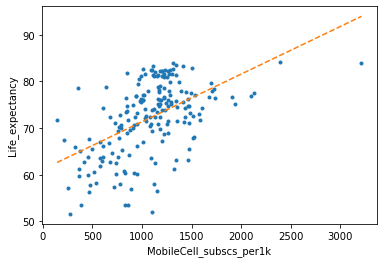

In [14]:
# Add the dots
plt.plot(dfr[xcol], dfr[ycol], '.')

# Add a line
xvals = np.linspace(min(x),max(x),100)
yvals = xvals*m + b
plt.plot(xvals, yvals, '--')

# Add the labels
plt.xlabel(xcol)
plt.ylabel(ycol)

# And show
plt.show()

A horrendous fit for sure. Let's take a look at the $R^2$.

In [15]:
r2 = linreg.score(x, y)
print(r2)

0.2808444705695229


Ow well, That wasn't too good, but there you have it.

## Predicting values using the model fit
Let's say you still want to press on with your rather questionable idea that mobile cell subscriptions are a great _linear_ predictor of life expectancy. We could now use this model, which we fit above using available countries, to predict life expectancy in other countries not included in our original list, for example, here is the mobile usage in a few lands not included above:

In [16]:
new_countries = {
    #'Country'   : mobile_cell_subscriptions
    'Loompaland' :  572,
    'Mordor'     : 1655,
    'Neverland'  :  127,
    'Atlantis'   : 2152,
}

new_x_vals = [ [val] for val in new_countries.values() ]

In [17]:
new_y_vals = linreg.predict(new_x_vals)
print(new_y_vals)

[[67.01078054]
 [78.0514927 ]
 [62.47419982]
 [83.11819071]]


In [18]:
for i, country in enumerate(new_countries.keys()):
    print(new_x_vals[i][0], new_y_vals[i][0], country)

572 67.01078053684344 Loompaland
1655 78.05149269949487 Mordor
127 62.47419982365795 Neverland
2152 83.11819070950203 Atlantis


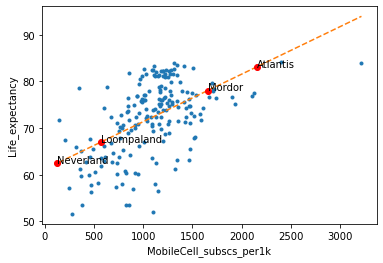

In [19]:
# Add the TRAINING dots
plt.plot(dfr[xcol], dfr[ycol], '.')

# Add a line
xvals = np.linspace(min(x),max(x),100)
yvals = xvals*m + b
plt.plot(xvals, yvals, '--')

# Add the PREDICTED dots
plt.plot(new_x_vals, new_y_vals, 'ro') # 'ro' means red big circles
# And the names of the countries
for i, country in enumerate(new_countries.keys()):
    plt.text(new_x_vals[i][0], new_y_vals[i][0], country)
    
# Add the labels
plt.xlabel(xcol)
plt.ylabel(ycol)

# And show
plt.show()

Clearly, our model is not a good fit. **Mordor** may be very high on technology, but it is well known that its citizens don't get to live very long lives.

I deliberately chose a terrible model here. There are multiple reasons why this is bad, not only because the predictor is not a great one, but also because life expectancy cannot possibly increase linearly, regardless of what the predictor is.

The key take-home message here is: **you need to choose the appropriate model _and_ the appropriate predictor(s) for your data**. This is far from trivial.

## A bit of machine-learning philosophy
I don't suppose I need to labour this point, but: **correlation does not imply causation**. Yet, to a point, machine learning just shrugs its shoulders at that statement and says **_Sure, but who cares?!_**. The fact is, for many machine-learning applications, it doesn't really matter _why_ you can predict something as long as you can predict it _reliably_. You can always then go back and try to figure out why [margarine consumption would correlate with divorce rates](https://tylervigen.com/spurious-correlations), or whatever. The answer may be:
+ **a)** The two factors correlate simply because of pure luck, and I shouldn't use them as predictors of each other because there's no reason to think they'll still correlate in the future.
+ **b)** They truly do correlate because of direct causal reasons; there is a legitimate, driving connection between the two that I haven't discovered yet.
+ **c)** They correlate only because something else causes both things to vary similarly, but they themselves are entirely unrelated.

The last one is interesting: The fact that two things correlate because of an underlying cause that is unknown doesn't mean the two known factors are any less useful as predictors of each other. If the connection to the true causal factor is solid in both cases, then the two affected values can be reliable predictors of each other, even if we ignore the true cause of the connection. This may not be great hypothesis-based science, but it is darn useful for machine-learning and in scenarios such as health and finance.

## Using `train-test-split` to test a model
In the last example we made up a few countries to test our model. However, in a more realistic scenario, you will want to make sure your model is making adequate predictions before you run it on unknown data.

Let's do a more reasonable prediction here. Let's try seeing how life expectancy correlates with how likely (on average) girls in a country are to complete the lower part of secondary school.

We first extract the desired columns and create the filtered dataframe:

In [20]:
xcol = 'LowSecondary_completion_female'#'Primary_completion_female'
ycol = 'Life_expectancy'#'LowSecondary_completion_female'

# Let's create the working dataframe
dfr = df[['Country', xcol, ycol]]
dfr

,Country,LowSecondary_completion_female,Life_expectancy
0,Afghanistan,36.819771,63.763000
1,Albania,NaN,78.194000
2,Algeria,87.665314,76.298000
3,American Samoa,NaN,NaN
4,Andorra,NaN,NaN
...,...,...,...
212,Virgin Islands (U.S.),NaN,79.268293
213,West Bank and Gaza,88.554771,73.589000
214,"Yemen, Rep.",45.206539,66.087000
215,Zambia,NaN,62.464000


As before, let's plot before we do anything:

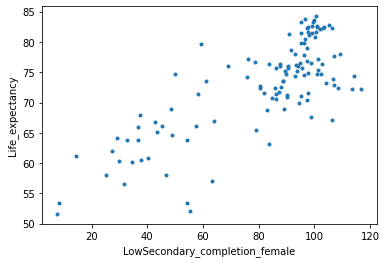

In [21]:
# Add the dots
plt.plot(dfr[xcol], dfr[ycol], '.')

# Add the labels
plt.xlabel(xcol)
plt.ylabel(ycol)

# And show
plt.show()

This looks better than the mobile-phone plot.

As you can see, `matplotlib` just ignores the `NaN`s, but `scikit-learn` breaks if they are there, so let's drop them:

In [22]:
dfr = dfr.dropna(how='any')

And now we could run the model with the whole data as above, but if we did that we'd be left without any way to test how accurate it is. Instead, let's split our data into a **training** set (traditionally 75% of the data is chosen to train the model) and a **testing** set (traditionally the remaining 25%).

After splitting our data, we will train the model with the training set, and then testing with the testing set (surprise!). We will then be ready to receive novel data.

### Split the dataset into ~75% training and ~25% testing

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)
# Let's take a look at the lengths of each of the sets:
print(len(xtrain), len(xtest))
print(len(xtrain), len(xtest))

146 49
146 49


That's as close to `75%:25%` as you can get with this dataset.

### Train the model with the training set
Good, now that we have a training set with `89` out of the `119` samples, we can train our model just like we did above, but using only the training set:

In [24]:
# We first declare an instance of the model
linreg = LinearRegression(fit_intercept=True)

# Fit the model to the data
linreg.fit(xtrain, ytrain)

# Get the intercept (b) and slope (m) as y = mx + b:
m = linreg.coef_[0][0]
b = linreg.intercept_[0]

print("The equation of the linear regression (y = mx + b) is:\n")
print(f"\ty = {m:0.3f}x + {b:0.3f}\n")
print(f"with an r2 of {linreg.score(xtrain, ytrain)}")

The equation of the linear regression (y = mx + b) is:

	y = 0.009x + 62.432

with an r2 of 0.24786334194551363


### Judging the adequacy of the model using the testing set
Now that we have a model and know how it `score`s with its own data, let's check how it fares with the test data:

In [25]:
print(f"The r2 with the testing data is {linreg.score(xtest, ytest)}")

The r2 with the testing data is 0.3545175484011268


Great! That looks pretty good. We're ready to now test with _real-World_ data, pun very much intended: we can take any countries that have a `LowSecondary_completion_female` but no `Life_expectancy` and predict the latter using our model (or we could do the opposite too).

## A more complex model with multiple predictors
So far we have been using simple one-to-one predictions, but there is absolutely no reason we need to limit ourselves in this way.

Let's take another high-level view at our data:

In [26]:
df.describe()

,Population,CO2_tons_per_capita,Primary_completion_female,Primary_completion_male,LowSecondary_completion_female,LowSecondary_completion_male,pct_Women_in_Parliament,Broadband_subscs_per1k,MobileCell_subscs_per1k,GDP_per_capita_USD,GNI_per_capita_USD,Life_expectancy
count,2.160000e+02,217.000000,133.000000,133.000000,123.000000,123.000000,192.000000,205.000000,207.000000,193.000000,192.00000,201.000000
mean,3.424723e+07,4.463764,92.052718,92.489008,81.361217,79.591794,20.888705,134.793136,1082.418611,20410.344154,19497.18750,72.320944
std,1.347982e+08,5.942907,16.444161,14.688918,25.905601,24.162610,12.018829,137.394806,405.034828,20933.463853,19444.76956,7.749837
min,1.122500e+04,0.000000,32.834202,48.877022,7.635840,11.978990,0.000000,0.000000,142.486031,796.944387,800.00000,51.593000
25%,7.627018e+05,0.595648,89.022141,89.599998,66.612473,65.939972,12.302328,7.479557,843.347300,4692.575942,4672.50000,67.175000
50%,6.424154e+06,2.495571,97.593224,96.522697,90.642464,87.019386,19.873534,87.520416,1107.610325,12632.013530,12315.00000,73.836000
75%,2.384867e+07,5.948891,101.701843,100.746208,98.956196,97.036179,29.580868,237.981622,1286.413258,28319.247010,27200.00000,77.964000
max,1.378665e+09,38.901471,133.333328,128.703705,116.886810,116.486862,63.750000,488.941424,3214.514160,115698.059200,107330.00000,84.226829


Let's use the rate of primary-school completion for females, gross national income (GNI), broadband subscriptions, and CO<sub>2</sub> emissions, to predict **life expectancy**.

We first define a dataframe with the desired columns, keeping the country for reference, and we drop its empty values (`NaN`s):

In [27]:
xcols = ['Primary_completion_female', 'Broadband_subscs_per1k', 'GNI_per_capita_USD', 'CO2_tons_per_capita']
ycol = 'Life_expectancy'
dfr = df[ ['Country'] + xcols + [ycol] ]
dfr = dfr.dropna(how='any')
dfr

,Country,Primary_completion_female,Broadband_subscs_per1k,GNI_per_capita_USD,CO2_tons_per_capita,Life_expectancy
0,Afghanistan,63.604069,0.248734,2000.0,0.245101,63.763000
1,Albania,102.297653,92.618097,12200.0,1.577163,78.194000
2,Algeria,105.560043,70.517164,11510.0,3.699156,76.298000
7,Argentina,104.334892,165.704726,19860.0,4.619085,76.221000
8,Armenia,91.668579,101.892072,10950.0,1.755976,74.640000
...,...,...,...,...,...,...
205,United Kingdom,100.823151,387.821707,43070.0,5.776796,81.156098
207,Uruguay,104.321251,269.170990,19650.0,1.975863,77.498000
208,Uzbekistan,96.440224,86.233629,6530.0,2.882786,71.171000
211,Vietnam,106.889603,97.067641,6300.0,2.057566,75.172000


Only 121 countries out of the original 217 have data for all the desired columns. It's always worth noting how much we lose by filtering (maybe we should remove some columns to increase coverage).

Creating the model itself is rather easy and similar to doing it with a single predictor:

In [28]:
# We again first declare an instance of the model
linreg = LinearRegression(fit_intercept=True)

# Then we rearrange the columns to the desired numpy format
X = dfr.loc[:, xcols].values # note the uppercase X
y = dfr.loc[:, ycol].values

# Fit the model to the data
linreg.fit(X, y)

LinearRegression()

Note that we are now using uppercase `X`, as opposed to lowercase `x` above. Uppercase `X` and lowercase `y` is traditional usage in machine learning circles (at least in Python), meant to signal that there are _many_ predictors for _one_ outcome.

Other than this, by convention, Python variables should always be named with starting lowercase unless you have very good reason to do otherwise.

We can now take a look at the coefficient (slope):

In [29]:
print(linreg.coef_)

[ 1.95601889e-01  2.10165853e-02  1.08880235e-04 -2.75834830e-02]


It turns out we don't have a single coefficient this time, but `4`, since we used that many predictors. We measly humans with our flat brains cannot visualise that, so we won't bother trying to plot it, but we can certainly check how good the fit is:

In [30]:
print(f"The r2 is {linreg.score(X, y)}")

The r2 is 0.7606104012483202


That's a rather decent r<sup>2</sup>... but do remember that life expectancy should not grow linearly (as far as we know anyway), so linear regression is probably not a great model for it. We measly humans are bound to perish (it seems), so we can't just extend our lives endlessly by simply pumping more CO<sub>2</sub> into the atmosphere, whatever our model may say... not that this will stop us trying to pump CO<sub>2</sub> into the atmosphere, but anyway.

However, what exactly is each of the four predictors doing for our model? We may need to take some of them out and see if our ability to predict remains similar (e.g., I suggest you try dropping the CO<sub>2</sub> emissions). We can also do more advanced statistical analyses to gauge the influence of each of our predictors.

There is a wide world of possibilities just with this one linear regression, and of course there is far more that can be done with scikit-learn. I hope this notebook has given you a useful introduction.